In [79]:
import graspy as gp
import numpy as np
import pandas as pd
from graspy.cluster import GaussianCluster
import seaborn as sns

import matplotlib.pyplot as plt
from src import generate_binary_sbms, estimate_embeddings
%matplotlib inline

In [64]:
np.random.seed(4)
# 5 is nice

X, Y, labels = generate_truncnorm_sbms_with_communities(
    m=100,
    block_1=25,
    block_2=25,
    mean_1=0,
    mean_2=0,
    var_1=0.25,
    var_2=0.25,
    mean_delta=.1,
    var_delta=0
)

omni = estimate_embeddings(X, Y, 'omni', 2)
mase = estimate_embeddings(X, Y, 'mase', 2)

omni_labels = GaussianCluster(2, 2).fit_predict(omni)
mase_labels = GaussianCluster(2, 2).fit_predict(mase)

if omni_labels[:25].sum() > 13:
    omni_labels = omni_labels^1

if mase_labels[:25].sum() > 13:
    mase_labels = mase_labels^1

In [ ]:
sns.set_context("talk")

kwargs = dict(
    palette = ["#e41a1c", "#377eb8"],
    s=150,
    legend=False,
)

fig, ax = plt.subplots(ncols=4, figsize=(20, 5), constrained_layout=True)

sns.scatterplot(x=omni[:, 0], y=omni[:,1], hue=labels, ax=ax[0], **kwargs)
sns.scatterplot(x=omni[:, 0], y=omni[:,1], hue=omni_labels, ax=ax[1], **kwargs)
sns.scatterplot(x=mase[:, 0], y=mase[:,1], hue=labels, ax=ax[2], **kwargs)
sns.scatterplot(x=mase[:, 0], y=mase[:,1], style=mase_labels != labels, hue=mase_labels, ax=ax[3], **kwargs)


# remove the x and y ticks
for a in ax:
    #a.axis('off')
    a.set_xticks([])
    a.set_yticks([])

In [137]:
np.random.seed(22)
# 5 is nice
# 22 is nice

X, Y, labels = generate_binary_sbms(
    m=50,
    block_1=25,
    block_2=25,
    p=0.5, 
    delta=0.15
)

omni = estimate_embeddings(X, Y, 'omni', 2)
mase = estimate_embeddings(X, Y, 'mase', 2)

omni_labels = GaussianCluster(2, 2).fit_predict(omni)
mase_labels = GaussianCluster(2, 2).fit_predict(mase)

if omni_labels[:25].sum() > 13:
    omni_labels = omni_labels^1

if mase_labels[:25].sum() > 13:
    mase_labels = mase_labels^1

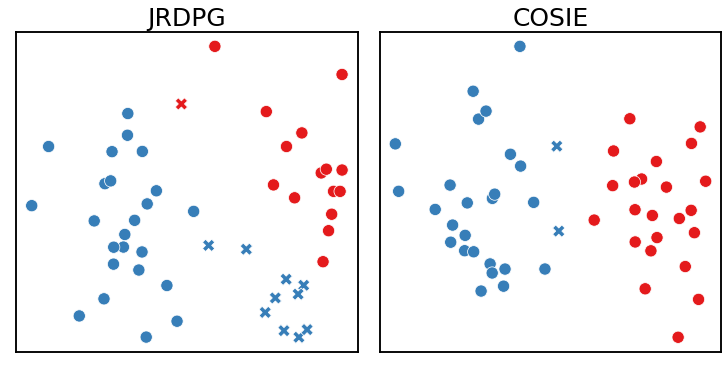

In [138]:
sns.set_context("talk")

kwargs = dict(
    palette = ["#e41a1c", "#377eb8"],
    s=150,
    legend=False,
)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), constrained_layout=True)

#sns.scatterplot(x=omni[:, 0], y=omni[:,1], hue=labels, ax=ax[0], **kwargs)
sns.scatterplot(x=omni[:, 0], y=omni[:,1], 
                style=omni_labels != labels,
                hue=omni_labels, ax=ax[0], **kwargs)
sns.scatterplot(x=mase[:, 0], 
                y=mase[:,1], 
                style=mase_labels != labels, 
                hue=mase_labels, 
                ax=ax[1], 
                **kwargs)

ax[0].set_title("JRDPG", fontsize=25)
ax[1].set_title("COSIE", fontsize=25)


# remove the x and y ticks
for a in ax:
    #a.axis('off')
    a.set_xticks([])
    a.set_yticks([])

In [ ]:
fig.savefig("exp3_")